In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, Callback
import time

Using TensorFlow backend.


### Load data
Load the (handwriting) digits data. There are 3 sets of data: train, valid, and test. Each set is a tuple with set[0] the data and set[1] the label. 

In [3]:
# Using python 3 but the pickle file is in python 2
# so some extra work need to be done
import pickle
import gzip
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='latin1')
f.close()

In [4]:
print(train_set[0].shape, valid_set[0].shape, test_set[0].shape)
img_dim = train_set[0].shape[1]
n_class = 10  ## There are 10 clases: digits 0-9

(50000, 784) (10000, 784) (10000, 784)


### Visualize data
Plot some of the digits images

1


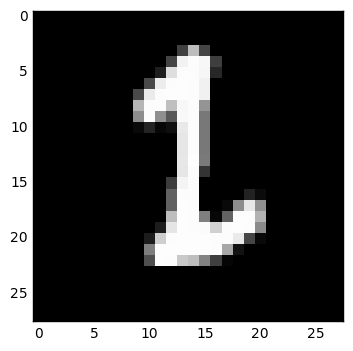

In [5]:
i = 70
imshow(train_set[0][i].reshape((28, 28)), cmap=cm.gray, interpolation='none')
print(train_set[1][i])

### Define the neural network model

In [6]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_dim=img_dim))
model.add(Dense(n_class, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model, using validation data to determine when to stop

In [35]:
# early stop if the validatiaon accuracy doesn't improve
earlystop = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=0, mode='auto')
class TestCallback(Callback):
    def __init__(self):
        self.test_acc = []

    def on_epoch_end(self, epoch, logs={}):
        _, test_acc = model.evaluate(test_set[0], test_set[1], verbose=0,batch_size=128)
        self.test_acc.append(test_acc)
        print("\ntest acc:{}\n".format(test_acc))
        
test_history = TestCallback()
h = model.fit(train_set[0], train_set[1], batch_size=128, nb_epoch=50, verbose=1,
              validation_data=(valid_set[0], valid_set[1]),callbacks=[earlystop,test_history])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
49920/50000 [============================>.] - ETA: 0s - loss: 0.7021 - acc: 0.8374
test acc:0.911

50000/50000 [==============================] - 2s - loss: 0.7018 - acc: 0.8374 - val_loss: 0.3305 - val_acc: 0.9146
Epoch 2/50
49920/50000 [============================>.] - ETA: 0s - loss: 0.3098 - acc: 0.9154
test acc:0.9258

50000/50000 [==============================] - 2s - loss: 0.3097 - acc: 0.9154 - val_loss: 0.2521 - val_acc: 0.9300
Epoch 3/50
49920/50000 [============================>.] - ETA: 0s - loss: 0.2489 - acc: 0.9294
test acc:0.9362

50000/50000 [==============================] - 3s - loss: 0.2490 - acc: 0.9294 - val_loss: 0.2150 - val_acc: 0.9392
Epoch 4/50
49920/50000 [============================>.] - ETA: 0s - loss: 0.2127 - acc: 0.9395
test acc:0.9446

50000/50000 [==============================] - 3s - loss: 0.2130 - acc: 0.9394 - val_loss: 0.1892 - val_acc: 0.9485
Epoch 5/50
49792/50000 [===============

training accuracy:0.99936
validattion accuracy:0.9779
No. epoch with best accurary: 34


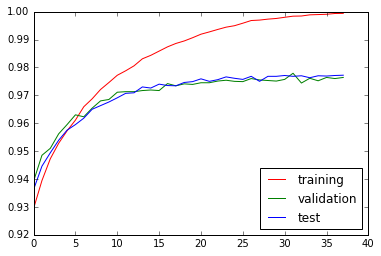

In [36]:
ptrain = h.history['acc']
pvalidataion = h.history['val_acc']
ptest = test_history.test_acc
plot(ptrain[2:], 'r',label='training')
plot(pvalidataion[2:], 'g',label='validation')
plot(ptest[2:],'b',label='test')
legend(loc=4)
print("training accuracy:{}\nvalidattion accuracy:{}\nNo. epoch with best accurary: {}".format(np.max(ptrain), np.max(pvalidataion), 1+np.argmax(pvalidataion)))

### Calculate performance on the test data

In [22]:
test_loss, test_acc = model.evaluate(test_set[0], test_set[1], verbose=0,batch_size=128)
print(test_acc)

0.9759


## HW 1
### Due Friday, Feb. 10th by the end of day. Submit your ipython notebook in moodle. Your notebook must contain both your code and the results of the experiments. You must clearly mark the plot/result sections.

In [7]:
def vary_architecture(num_layer=1,num_neuron=100,activation='sigmoid',patience=10,max_epoch=200,verbose=0):
    """train a network with different architecture, return the history of training, validation and test accuracy"""
    
    # construct the model
    
    model = Sequential()
    # first hidden layer
    model.add(Dense(num_neuron, activation=activation, input_dim=img_dim))
    # the rest hidden layer
    for i in range(num_layer-1):
        model.add(Dense(num_neuron, activation=activation))
    model.add(Dense(n_class, activation=activation))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    if verbose == 1:
        model.summary()
    
    # two callback functions: early stop and test history
    
    class TestCallback(Callback):
        def __init__(self):
            self.test_acc = []
        def on_epoch_end(self, epoch, logs={}):
            _, test_acc = model.evaluate(test_set[0], test_set[1], verbose=0,batch_size=128)
            self.test_acc.append(test_acc)
    earlystop = EarlyStopping(monitor='val_acc', min_delta=0, patience=patience, verbose=0, mode='auto') 
    test_history = TestCallback()
    
    # train the model
    
    h = model.fit(train_set[0], train_set[1], batch_size=128, nb_epoch=max_epoch, verbose=verbose,
              validation_data=(valid_set[0], valid_set[1]),callbacks=[earlystop,test_history])
    
    # training history
    history = {}
    history['train_acc'] = h.history['acc']
    history['val_acc'] = h.history['val_acc']
    history['test_acc'] = test_history.test_acc
    
    return history
    
    

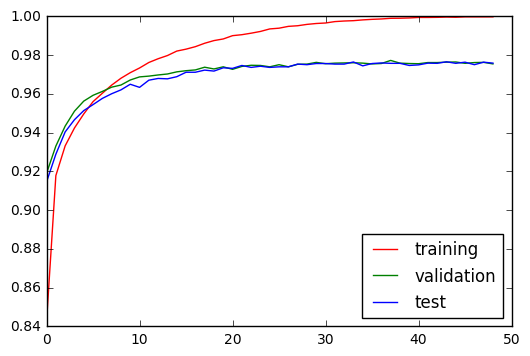

In [16]:
history1 = vary_architecture(num_layer=1,num_neuron=100,max_epoch=200)
plot(history1['train_acc'], 'r',label='training')
plot(history1['val_acc'], 'g',label='validation')
plot(history1['test_acc'],'b',label='test')
legend(loc=4)

### Task 1
The example given above used a 2-layered NN (one internal layer and one output layer). Try increase the number of neurons in the internal layer. Experiment with 200, 500, 1000. (If your computer is powerful enough, you can go higher.) 
- Plot the training accuracy vs number of internal neurons. (You need to train the model enough epoches so that the training accuracy converges (or almost converges). Use the (almost) converged value in your plot. 
- Plot number of epoches it takes for the training acc to reaches 0.99 vs number of internal-layer neurons. 
- Plot the best test accuracy you can achieve vs number of internal-layer neurons. (Note the best test acc may be achieved before train acc reaches the best value.)
- What are the trends you observe in these plots? Comment on your observations. 

In [8]:
num_neurons = [200,500,1000,1500,2000,2500,3000]
result = {}
for n in num_neurons:
    print('\n')
    print('========== {} neurons =========='.format(n))
    result[n] = {}
    history = vary_architecture(num_layer=1,num_neuron=n,max_epoch=100,patience=100) # train 100 epoch
    train_acc = np.array(history['train_acc'])
    test_acc = np.array(history['test_acc'])
    result[n]['best_train_acc'] = np.max(train_acc)
    result[n]['epoch_to_99_perct'] = np.where(train_acc > 0.99)[0][0] + 1
    result[n]['best_test_acc'] = np.max(test_acc)
    result[n]['epoch_to_best_test_acc'] = np.argmax(test_acc) + 1
    print('\n')



========== 200 neurons ==========




========== 500 neurons ==========




========== 1000 neurons ==========




========== 1500 neurons ==========




========== 2000 neurons ==========




========== 2500 neurons ==========




========== 3000 neurons ==========




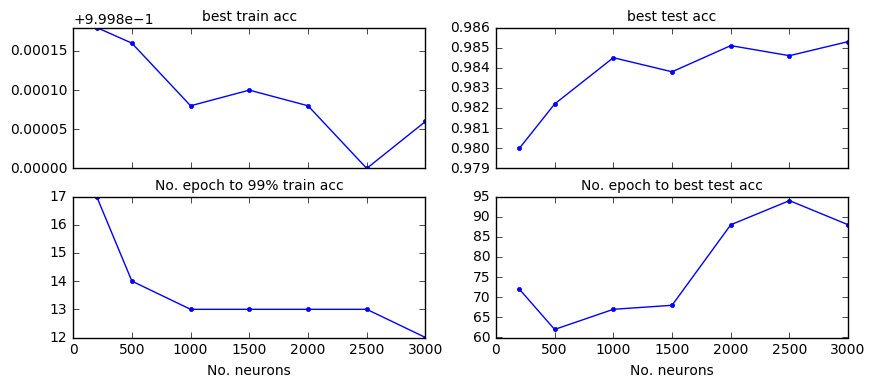

In [11]:
fig,((ax1,ax2),(ax3,ax4)) = subplots(2,2,figsize=(10,4),sharex=True)

ax1.set_title('best train acc',fontsize=10)
ax1.plot(num_neurons,[result[n]['best_train_acc'] for n in num_neurons],'.-')
ax2.set_title('best test acc',fontsize=10)
ax2.plot(num_neurons,[result[n]['best_test_acc'] for n in num_neurons],'.-')
ax3.set_title('No. epoch to 99% train acc',fontsize=10)
ax3.plot(num_neurons,[result[n]['epoch_to_99_perct'] for n in num_neurons],'.-')
ax4.set_title('No. epoch to best test acc',fontsize=10)
ax4.plot(num_neurons,[result[n]['epoch_to_best_test_acc'] for n in num_neurons],'.-')
ax3.set_xlabel('No. neurons', fontsize=10)
ax4.set_xlabel('No. neurons', fontsize=10)

There are a few observations:
1. The test accuracy increases as we include more neurons.
2. The train accuracy is almost 1 for all cases, but slightly decrease as we increase the number of neurons.
3. The number of epoch to reach 99% decreases.
4. The network takes more epoch to train to reach the best test accuracy, as we increase the number of neurons.

### Task 2
Add more (internal) layers to the model, fix the number of neurons in each layer to be 100. Experiment with 3, 5, 10 internal layers. (If your computer is powerful enough, you can go higher.) 
- Plot the training accuracy vs number of internal layerss.  
- Plot the best test accuracy you can achieve vs number of internal layers.
- What are the trends you observe in these plots? Comment on your observations. 

In [14]:
num_layers = [3,5,10,20,30]
result = {}
for n in num_layers:
    print('========== {} layers =========='.format(n))
    result[n] = {}
    history = vary_architecture(num_layer=n,num_neuron=100,max_epoch=100,patience=100)
    train_acc = np.array(history['train_acc'])
    test_acc = np.array(history['test_acc'])
    result[n]['best_train_acc'] = np.max(train_acc)
    result[n]['best_test_acc'] = np.max(test_acc)
    result[n]['epoch_to_best_test_acc'] = np.argmax(test_acc) + 1
    print('\n')

========== 3 layers ==========


========== 5 layers ==========


========== 10 layers ==========


========== 20 layers ==========


========== 30 layers ==========




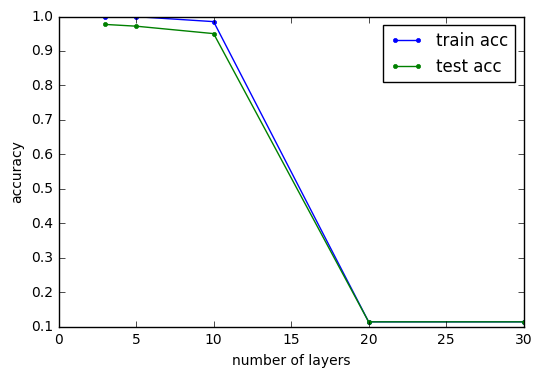

In [19]:
plot(num_layers,[result[n]['best_train_acc'] for n in num_layers],'.-',label='train acc')
plot(num_layers,[result[n]['best_test_acc'] for n in num_layers],'.-',label='test acc')
xlabel('number of layers')
ylabel('accuracy')
legend()

### Task 3
Explore different activation function for the neurons in the internal layers. Fix the model to have 3 internal layers, each with 100 neurons. Experiment with 'sigmoid',
'tanh', and 'relu' as activation function for the internal neurons. 
- Time your training. Bar plot time (in sec) it takes to run 30 epoches of training under different activation.  
- Bar plot the best test accuracy you can achieve with respect to different activation.
- What are the trends you observe in these plots? Comment on your observations. 

In [10]:
activation_type = ['sigmoid','tanh','relu']
result = {}
for activation in activation_type:
    print('\n')
    print('========== {} activation =========='.format(activation))
    result[activation] = {}
    
    walltime = time.time()
    history = vary_architecture(num_layer=3,num_neuron=100,activation=activation,max_epoch=30)
    walltime = time.time() - walltime
    
    train_acc = np.array(history['train_acc'])
    test_acc = np.array(history['test_acc'])
    result[activation]['best_test_acc'] = np.max(test_acc)
    result[activation]['walltime'] = np.max(walltime)
    print('\n')



========== sigmoid activation ==========




========== sigmoid activation ==========




========== sigmoid activation ==========




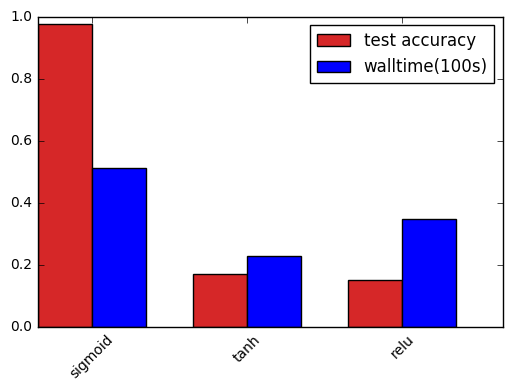

In [35]:
N = 3
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, [result[i]['best_test_acc'] for i in activation_type], width,
                color='#d62728',
                error_kw=dict(elinewidth=2,ecolor='red'))

rects2 = ax.bar(ind+width, [result[i]['walltime']/100 for i in activation_type], width,
                    
                    error_kw=dict(elinewidth=2,ecolor='black'))
xTickMarks = [str(i) for i in activation_type]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
setp(xtickNames, rotation=45, fontsize=10)
ax.legend( (rects1[0], rects2[0]), ('test accuracy', 'walltime(100s)') )

It appears that the sigmoid has the best accuracy but are more difficult to train. Tanh and relu have about the same accuracy, but relu is slightly more difficult to train, and both of them train faster than sigmoid.